<a href="https://colab.research.google.com/github/OJO44/Python-Data-Analysis/blob/main/CapstoneProjectSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

In [ ]:
#Loading the data
data= "/data (2).xlsx"
sales = pd.read_excel(data)
sales.head()
sales.tail()

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3307,9989,CA-2017-163629,2020-11-17,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470
3308,9991,CA-2017-121258,2020-02-26,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
3309,9992,CA-2017-121258,2020-02-26,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
3310,9993,CA-2017-121258,2020-02-26,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
3311,9994,CA-2017-119914,2020-05-04,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [ ]:
#Inspecting data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         3312 non-null   int64         
 1   Order ID       3312 non-null   object        
 2   Order Date     3312 non-null   datetime64[ns]
 3   Ship Mode      3312 non-null   object        
 4   Customer ID    3312 non-null   object        
 5   Customer Name  3312 non-null   object        
 6   Segment        3312 non-null   object        
 7   Country        3312 non-null   object        
 8   City           3312 non-null   object        
 9   State          3312 non-null   object        
 10  Postal Code    3312 non-null   int64         
 11  Region         3312 non-null   object        
 12  Product ID     3312 non-null   object        
 13  Category       3312 non-null   object        
 14  Sub-Category   3312 non-null   object        
 15  Product Name   3312 n

In [ ]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

In [ ]:
sales.shape

(3312, 20)

In [ ]:
#Confirm missingness
sales.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
#We have just confirmed that our data is good for analysis so lets dig deeper.
sales.describe()

,Row ID,Order Date,Postal Code,Sales,Quantity,Discount,Profit
count,3312.000000,3312,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000
mean,5087.107488,2020-08-07 06:03:02.608695808,56186.515097,221.381418,3.766908,0.156467,28.212340
min,13.000000,2020-01-01 00:00:00,1841.000000,0.444000,1.000000,0.000000,-3839.990400
25%,2655.750000,2020-05-15 00:00:00,27978.750000,17.018000,2.000000,0.000000,1.763200
50%,5183.500000,2020-09-02 00:00:00,60472.500000,53.810000,3.000000,0.200000,8.296800
75%,7498.250000,2020-11-06 00:00:00,90032.000000,205.105700,5.000000,0.200000,28.315125
max,9994.000000,2020-12-30 00:00:00,99301.000000,13999.960000,14.000000,0.800000,6719.980800
std,2817.482266,NaN,31980.375516,585.257531,2.221776,0.207429,241.864342


In [ ]:
sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')



```
`# This is formatted as code`
```

Data analysis

In [ ]:
# what are some of the unique  values in ship mode
# getting the count of nuniques values
sales['Ship Mode'].nunique()
sales['Ship Mode'].value_counts()

Ship Mode
Standard Class    1897
Second Class       657
First Class        572
Same Day           186
Name: count, dtype: int64

In [ ]:
#What was the highest sales in 2020
sales['Order Date']
sales.nlargest(5,'Sales')

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2710,8154,CA-2017-140151,2020-03-23,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
810,2624,CA-2017-127180,2020-10-22,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
1342,4191,CA-2017-166709,2020-11-17,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
185,684,US-2017-168116,2020-11-04,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
2142,6521,CA-2017-138289,2020-01-16,Second Class,AR-10540,Andy Reiter,Consumer,United States,Jackson,Michigan,49201,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,5443.960,4,0.0,2504.2216


Order Date
2020-01-31     43971.3740
2020-02-29     20301.1334
2020-03-31     58872.3528
2020-04-30     36521.5361
2020-05-31     44261.1102
2020-06-30     52981.7257
2020-07-31     45264.4160
2020-08-31     63120.8880
2020-09-30     87866.6520
2020-10-31     77776.9232
2020-11-30    118447.8250
2020-12-31     83829.3188
Freq: M, Name: Sales, dtype: float64


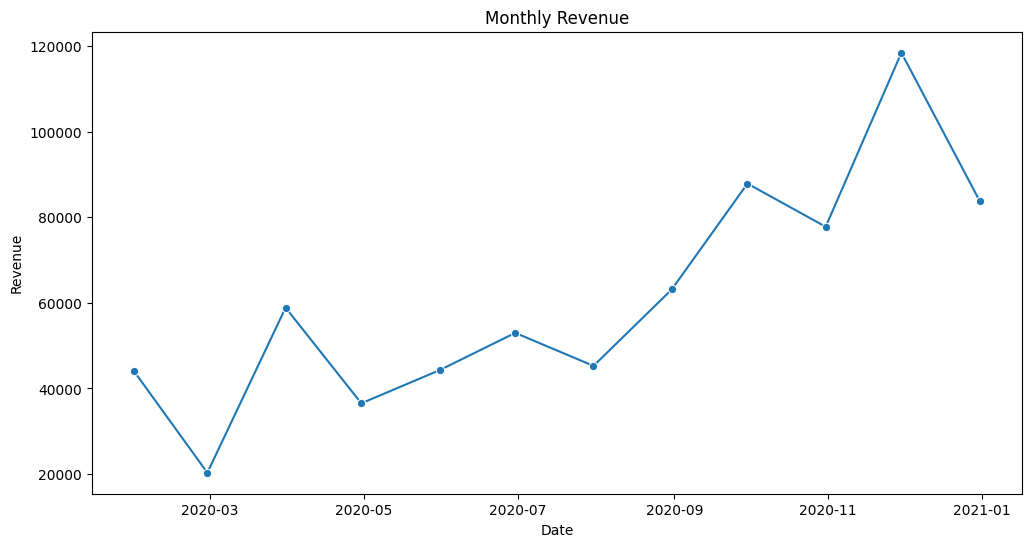

<Figure size 640x480 with 0 Axes>

In [ ]:

# Monthly Revenue
monthly_revenue = sales.resample('M', on='Order Date')['Sales'].sum()
print(monthly_revenue)
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, marker='o')
plt.title('Monthly Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()
# Save the visualization
plt.savefig('monthly_revenue.png', dpi=300)

Order Date
2020-01-31         NaN
2020-02-29   -0.538310
2020-03-31    1.899954
2020-04-30   -0.379649
2020-05-31    0.211918
2020-06-30    0.197027
2020-07-31   -0.145660
2020-08-31    0.394492
2020-09-30    0.392038
2020-10-31   -0.114830
2020-11-30    0.522917
2020-12-31   -0.292268
Freq: M, Name: Sales, dtype: float64


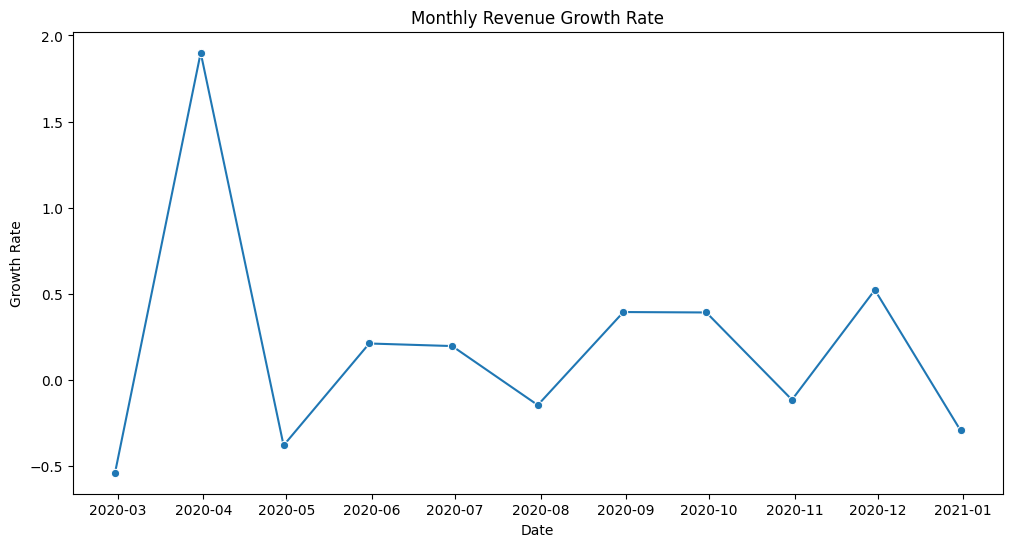

<Figure size 640x480 with 0 Axes>

In [ ]:

# Monthly Revenue Growth Rate
monthly_revenue_growth = monthly_revenue.pct_change() #pct_change compares current value from past value.
print(monthly_revenue_growth)
# Plot Monthly Revenue Growth Rate
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue_growth, marker='o')
plt.title('Monthly Revenue Growth Rate')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.show()
# Save the visualization
plt.savefig('monthly_revenue_growth_rate.png', dpi=300)


Order Date
2020-01-31     67
2020-02-29     53
2020-03-31    115
2020-04-30    109
2020-05-31    113
2020-06-30    118
2020-07-31    102
2020-08-31    104
2020-09-30    196
2020-10-31    136
2020-11-30    216
2020-12-31    195
Freq: M, Name: Customer ID, dtype: int64


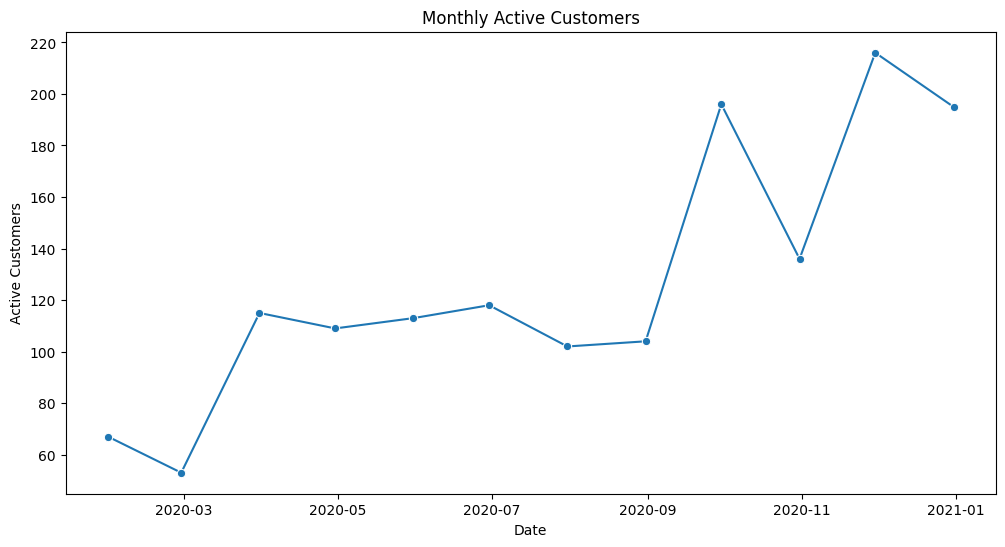

In [ ]:
# Monthly active customers
monthly_active_customers = sales.resample('M', on='Order Date')['Customer ID'].nunique()
print(monthly_active_customers)
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_active_customers, marker='o')
plt.title('Monthly Active Customers')
plt.xlabel('Date')
plt.ylabel('Active Customers')
plt.show()

Order Date
2020-01-31     69
2020-02-29     53
2020-03-31    118
2020-04-30    116
2020-05-31    118
2020-06-30    133
2020-07-31    111
2020-08-31    111
2020-09-30    226
2020-10-31    147
2020-11-30    261
2020-12-31    224
Freq: M, Name: Order ID, dtype: int64


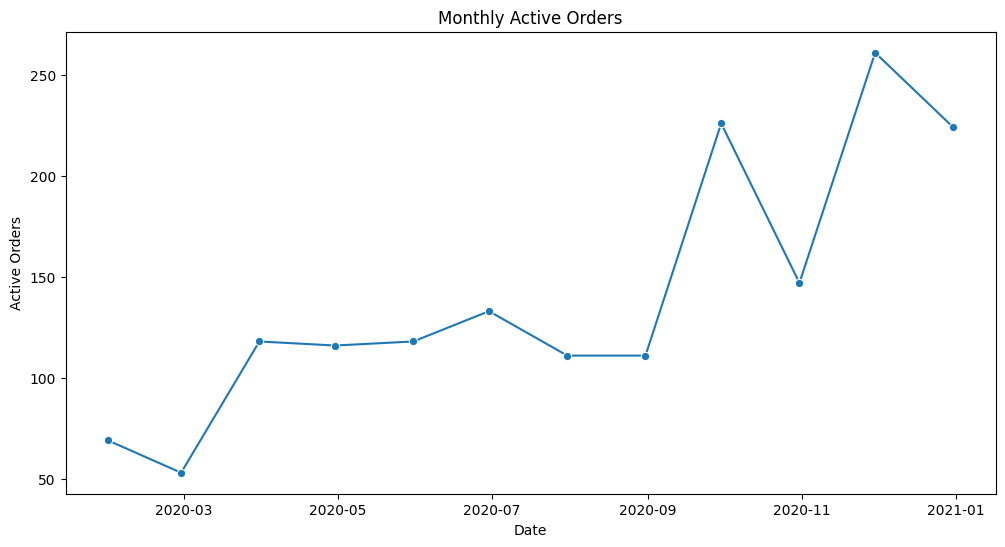

In [ ]:
# Monthly active orders
monthly_active_orders = sales.resample('M', on='Order Date')['Order ID'].nunique()
print(monthly_active_orders)
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_active_orders, marker='o')
plt.title('Monthly Active Orders')
plt.xlabel('Date')
plt.ylabel('Active Orders')
plt.show()

Order Date
2020-01-31    637.266290
2020-02-29    383.040253
2020-03-31    498.918244
2020-04-30    314.840828
2020-05-31    375.094154
2020-06-30    398.358840
2020-07-31    407.787532
2020-08-31    568.656649
2020-09-30    388.790496
2020-10-31    529.094716
2020-11-30    453.823084
2020-12-31    374.238030
Freq: M, dtype: float64


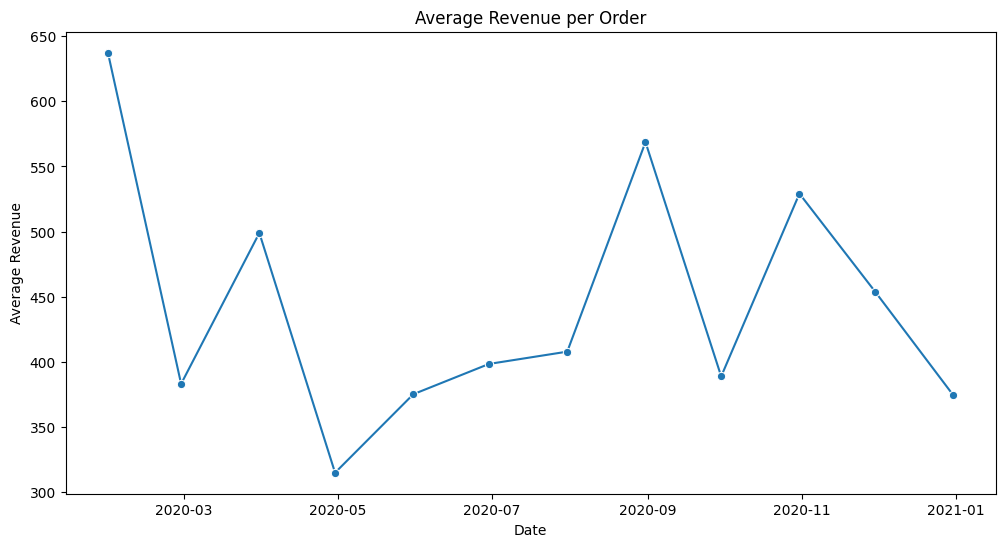

In [ ]:
# Average Revenue per Order
average_revenue_per_order = monthly_revenue / monthly_active_orders
print(average_revenue_per_order)
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_revenue_per_order, marker='o')
plt.title('Average Revenue per Order')
plt.xlabel('Date')
plt.ylabel('Average Revenue')
plt.show()

In [ ]:
# how about the highest sale
sales.iloc[sales['Sales'].argmax()] #iloc a specific row or rows #The main difference between loc and iloc is that loc uses the row and column labels to access the data, whereas iloc uses the integer-based index positions.

Row ID                                            8154
Order ID                                CA-2017-140151
Ship Mode                                  First Class
Customer ID                                   RB-19360
Customer Name                             Raymond Buch
Segment                                       Consumer
Country                                  United States
City                                           Seattle
State                                       Washington
Postal Code                                      98115
Region                                            West
Product ID                             TEC-CO-10004722
Category                                    Technology
Sub-Category                                   Copiers
Product Name     Canon imageCLASS 2200 Advanced Copier
Sales                                         13999.96
Quantity                                             4
Discount                                           0.0
Profit    

<Axes: ylabel='Frequency'>

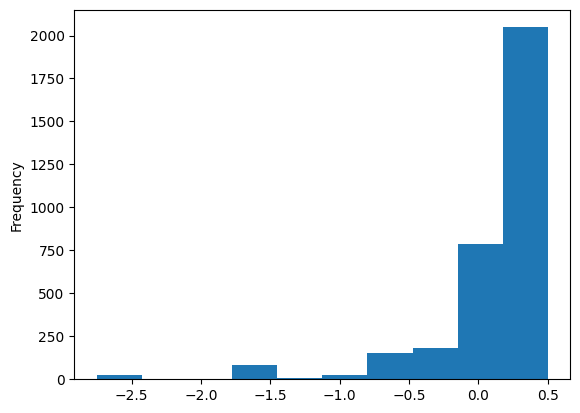

In [ ]:
# what could have been the profit margin for each sales
# to answer this question we need to create a column for margin profit
# margin is the profit realized devide by the total sales made
sales['Profit']/sales['Sales']
# we then create a column to hold the computed results
sales['Profit Margin'] = sales['Profit']/sales['Sales']
# lets check that changes have have taken effect on the
sales['Profit Margin'].plot(kind='hist',bins = 10)
# we then visualize the results

In [ ]:
# lets get sales description
sales['Sales'].describe()

count     3312.000000
mean       221.381418
std        585.257531
min          0.444000
25%         17.018000
50%         53.810000
75%        205.105700
max      13999.960000
Name: Sales, dtype: float64

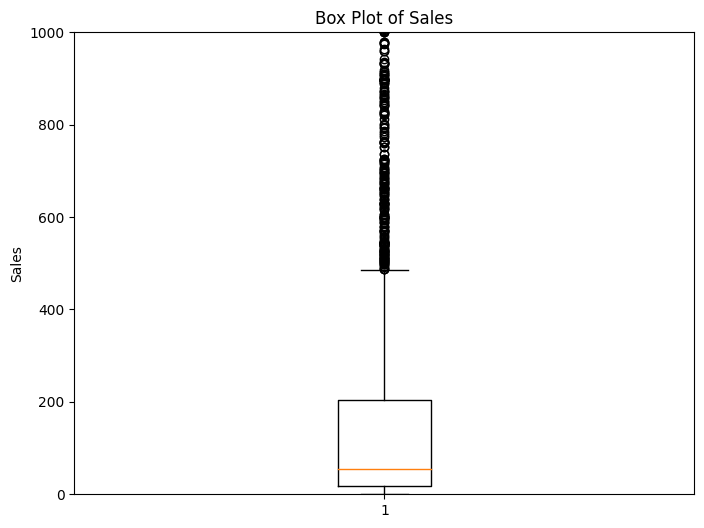

<Figure size 640x480 with 0 Axes>

In [ ]:
# Check Skewness of the data
# Create a box plot for the 'Sales' column
plt.figure(figsize=(8, 6))
plt.boxplot(sales['Sales'])
plt.ylim(0, 1000)  # Set the y-axis limits
plt.ylabel('Sales')
plt.title('Box Plot of Sales')
plt.show()
# Save the visualization
plt.savefig('sales_boxplot.png', dpi=300)

In [ ]:
# Exclude the 'Order Date' column before performing the sum operation
grouped_data = sales.drop(columns=['Order Date']).groupby('Sub-Category').sum()
grouped_data.reset_index(inplace=True)
grouped_data.head()

,Sub-Category,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Profit Mergin
0,Accessories,1449605,CA-2017-155558CA-2017-119004US-2017-100930CA-2...,Standard ClassStandard ClassStandard ClassSeco...,PG-18895JM-15250CS-12400CC-12670MV-18190KH-165...,Paul GonzalezJanet MartinChristopher SchildCra...,ConsumerConsumerHome OfficeConsumerConsumerCon...,United StatesUnited StatesUnited StatesUnited ...,RochesterCharlotteTampaNew York CityNew York C...,MinnesotaNorth CarolinaFloridaNew YorkNew York...,...,TEC-AC-10001998TEC-AC-10003499TEC-AC-10003832T...,TechnologyTechnologyTechnologyTechnologyTechno...,Logitech LS21 Speaker System - PC Multimedia -...,59946.2320,1079,19.80,15672.3570,555500,2153,62.655000
1,Appliances,874517,CA-2017-155376US-2017-152366US-2017-116701US-2...,Standard ClassSecond ClassSecond ClassStandard...,SG-20080SJ-20500LC-17140Dl-13600VB-21745RF-198...,Sandra GlasscoShirley JacksonLogan CurrieDorri...,ConsumerConsumerConsumerCorporateCorporateCons...,United StatesUnited StatesUnited StatesUnited ...,IndependenceHoustonDallasPasadenaColumbusNew Y...,MissouriTexasTexasTexasGeorgiaNew YorkColorado...,...,OFF-AP-10001058OFF-AP-10002684OFF-AP-10003217O...,Office SuppliesOffice SuppliesOffice SuppliesO...,Sanyo 2.5 Cubic Foot Mid-Size Office Refrigera...,42926.9320,654,29.10,7865.2683,333300,1255,-36.133889
2,Art,1377681,CA-2017-119004CA-2017-106180CA-2017-136826CA-2...,Standard ClassStandard ClassStandard ClassFirs...,JM-15250SH-19975CB-12535BB-10990SH-20395TD-209...,Janet MartinSally HughsbyClaudia BergmannBarry...,ConsumerCorporateCorporateCorporateConsumerCon...,United StatesUnited StatesUnited StatesUnited ...,CharlotteSan FranciscoChapel HillInglewoodArli...,North CarolinaCaliforniaNorth CarolinaCaliforn...,...,OFF-AR-10000390OFF-AR-10000940OFF-AR-10003602O...,Office SuppliesOffice SuppliesOffice SuppliesO...,Newell Chalk HolderNewell 343Quartet Omega Col...,8863.0680,1101,22.20,2221.9631,569640,2146,70.995000
3,Binders,2500416,US-2017-118038US-2017-109484CA-2017-157833US-2...,First ClassStandard ClassFirst ClassStandard C...,KB-16600RB-19705KD-16345TS-21610FH-14365JH-159...,Ken BrennanRoger BarcioKatherine DucichTroy St...,CorporateHome OfficeConsumerConsumerCorporateC...,United StatesUnited StatesUnited StatesUnited ...,HoustonPortlandSan FranciscoPhoenixPhiladelphi...,TexasOregonCaliforniaArizonaPennsylvaniaMichig...,...,OFF-BI-10004182OFF-BI-10004738OFF-BI-10001721O...,Office SuppliesOffice SuppliesOffice SuppliesO...,Economy BindersFlexible Leather- Look Classic ...,72788.0450,2067,189.10,7669.7418,1010000,3841,-107.832500
4,Bookcases,384522,CA-2017-117457CA-2017-154907CA-2017-140963CA-2...,Standard ClassStandard ClassFirst ClassStandar...,KH-16510DS-13180MT-18070RA-19285DS-13030PO-188...,Keith HerreraDavid SmithMichelle TranRalph Arn...,ConsumerCorporateHome OfficeConsumerHome Offic...,United StatesUnited StatesUnited StatesUnited ...,San FranciscoAmarilloLos AngelesNew York CityS...,CaliforniaTexasCaliforniaNew YorkWashingtonNew...,...,FUR-BO-10001972FUR-BO-10002824FUR-BO-10001337F...,FurnitureFurnitureFurnitureFurnitureFurnitureF...,O'Sullivan 4-Shelf Bookcase in Odessa PineBush...,30024.2797,276,16.32,-583.6261,153520,552,-11.233641


In [ ]:

def group_data(col):
    """
    group data by a column and a return a grouped dataframe

    """
    data_temp = sales.drop(columns=['Order Date']).groupby(col).sum()
    data_temp.reset_index(inplace=True)
    return data_temp
group_data('Segment')

,Segment,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin
0,Consumer,8561367,CA-2017-114412US-2017-156909CA-2017-114440CA-2...,Standard ClassSecond ClassSecond ClassSecond C...,AA-10480SF-20065TB-21520PO-18865PG-18895PG-188...,Andrew AllenSandra FlanaganTracy BlumsteinPatr...,United StatesUnited StatesUnited StatesUnited ...,ConcordPhiladelphiaJacksonColumbiaRochesterRoc...,North CarolinaPennsylvaniaMichiganSouth Caroli...,92871614,SouthEastCentralSouthCentralCentralWestSouthSo...,OFF-PA-10002365FUR-CH-10002774OFF-PA-10004675F...,Office SuppliesFurnitureOffice SuppliesFurnitu...,PaperChairsPaperChairsAccessoriesLabelsBinders...,"Xerox 1967Global Deluxe Stacking Chair, GrayTe...",331904.6999,6282,264.12,45568.2391,186.803297
1,Corporate,5023960,CA-2017-120999CA-2017-139619US-2017-118038US-2...,Standard ClassStandard ClassFirst ClassFirst C...,LC-16930ES-14080KB-16600KB-16600KB-16600CV-128...,Linda CazamiasErin SmithKen BrennanKen Brennan...,United StatesUnited StatesUnited StatesUnited ...,NapervilleMelbourneHoustonHoustonHoustonNew Yo...,IllinoisFloridaTexasTexasTexasNew YorkOhioOhio...,54879479,CentralSouthCentralCentralCentralEastEastEastE...,TEC-PH-10004093OFF-ST-10003282OFF-BI-10004182F...,TechnologyOffice SuppliesOffice SuppliesFurnit...,PhonesStorageBindersFurnishingsStorageFurnishi...,Panasonic Kx-TS550Advantus 10-Drawer Portable ...,241847.8244,3758,154.68,26782.3633,111.247822
2,Home Office,3263173,CA-2017-107727US-2017-119662US-2017-109484CA-2...,Second ClassFirst ClassStandard ClassSecond Cl...,MA-17560CS-12400RB-19705PN-18775VM-21685CS-124...,Matt AbelmanChristopher SchildRoger BarcioParh...,United StatesUnited StatesUnited StatesUnited ...,HoustonChicagoPortlandNew York CityWestfieldTa...,TexasIllinoisOregonNew YorkNew JerseyFloridaFl...,38338645,CentralCentralWestEastEastSouthSouthSouthSouth...,OFF-PA-10000249OFF-ST-10003656OFF-BI-10004738F...,Office SuppliesOffice SuppliesOffice SuppliesF...,PaperStorageBindersFurnishingsStorageTablesTab...,Easy-staple paperSafco Industrial Wire Shelvin...,159462.7309,2436,99.42,21088.6672,86.078886


In [ ]:
df=group_data('Sub-Category')
df.head()

,Sub-Category,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin
0,Accessories,1449605,CA-2017-155558CA-2017-119004US-2017-100930CA-2...,Standard ClassStandard ClassStandard ClassSeco...,PG-18895JM-15250CS-12400CC-12670MV-18190KH-165...,Paul GonzalezJanet MartinChristopher SchildCra...,ConsumerConsumerHome OfficeConsumerConsumerCon...,United StatesUnited StatesUnited StatesUnited ...,RochesterCharlotteTampaNew York CityNew York C...,MinnesotaNorth CarolinaFloridaNew YorkNew York...,15762114,CentralSouthSouthEastEastWestCentralSouthCentr...,TEC-AC-10001998TEC-AC-10003499TEC-AC-10003832T...,TechnologyTechnologyTechnologyTechnologyTechno...,Logitech LS21 Speaker System - PC Multimedia -...,59946.2320,1079,19.80,15672.3570,62.655000
1,Appliances,874517,CA-2017-155376US-2017-152366US-2017-116701US-2...,Standard ClassSecond ClassSecond ClassStandard...,SG-20080SJ-20500LC-17140Dl-13600VB-21745RF-198...,Sandra GlasscoShirley JacksonLogan CurrieDorri...,ConsumerConsumerConsumerCorporateCorporateCons...,United StatesUnited StatesUnited StatesUnited ...,IndependenceHoustonDallasPasadenaColumbusNew Y...,MissouriTexasTexasTexasGeorgiaNew YorkColorado...,9377881,CentralCentralCentralCentralSouthEastWestWestC...,OFF-AP-10001058OFF-AP-10002684OFF-AP-10003217O...,Office SuppliesOffice SuppliesOffice SuppliesO...,Sanyo 2.5 Cubic Foot Mid-Size Office Refrigera...,42926.9320,654,29.10,7865.2683,-36.133889
2,Art,1377681,CA-2017-119004CA-2017-106180CA-2017-136826CA-2...,Standard ClassStandard ClassStandard ClassFirs...,JM-15250SH-19975CB-12535BB-10990SH-20395TD-209...,Janet MartinSally HughsbyClaudia BergmannBarry...,ConsumerCorporateCorporateCorporateConsumerCon...,United StatesUnited StatesUnited StatesUnited ...,CharlotteSan FranciscoChapel HillInglewoodArli...,North CarolinaCaliforniaNorth CarolinaCaliforn...,16355998,SouthWestSouthWestSouthEastEastEastWestWestCen...,OFF-AR-10000390OFF-AR-10000940OFF-AR-10003602O...,Office SuppliesOffice SuppliesOffice SuppliesO...,Newell Chalk HolderNewell 343Quartet Omega Col...,8863.0680,1101,22.20,2221.9631,70.995000
3,Binders,2500416,US-2017-118038US-2017-109484CA-2017-157833US-2...,First ClassStandard ClassFirst ClassStandard C...,KB-16600RB-19705KD-16345TS-21610FH-14365JH-159...,Ken BrennanRoger BarcioKatherine DucichTroy St...,CorporateHome OfficeConsumerConsumerCorporateC...,United StatesUnited StatesUnited StatesUnited ...,HoustonPortlandSan FranciscoPhoenixPhiladelphi...,TexasOregonCaliforniaArizonaPennsylvaniaMichig...,29015384,CentralWestWestWestEastCentralSouthEastEastWes...,OFF-BI-10004182OFF-BI-10004738OFF-BI-10001721O...,Office SuppliesOffice SuppliesOffice SuppliesO...,Economy BindersFlexible Leather- Look Classic ...,72788.0450,2067,189.10,7669.7418,-107.832500
4,Bookcases,384522,CA-2017-117457CA-2017-154907CA-2017-140963CA-2...,Standard ClassStandard ClassFirst ClassStandar...,KH-16510DS-13180MT-18070RA-19285DS-13030PO-188...,Keith HerreraDavid SmithMichelle TranRalph Arn...,ConsumerCorporateHome OfficeConsumerHome Offic...,United StatesUnited StatesUnited StatesUnited ...,San FranciscoAmarilloLos AngelesNew York CityS...,CaliforniaTexasCaliforniaNew YorkWashingtonNew...,4483249,WestCentralWestEastWestEastCentralWestWestEast...,FUR-BO-10001972FUR-BO-10002824FUR-BO-10001337F...,FurnitureFurnitureFurnitureFurnitureFurnitureF...,O'Sullivan 4-Shelf Bookcase in Odessa PineBush...,30024.2797,276,16.32,-583.6261,-11.233641


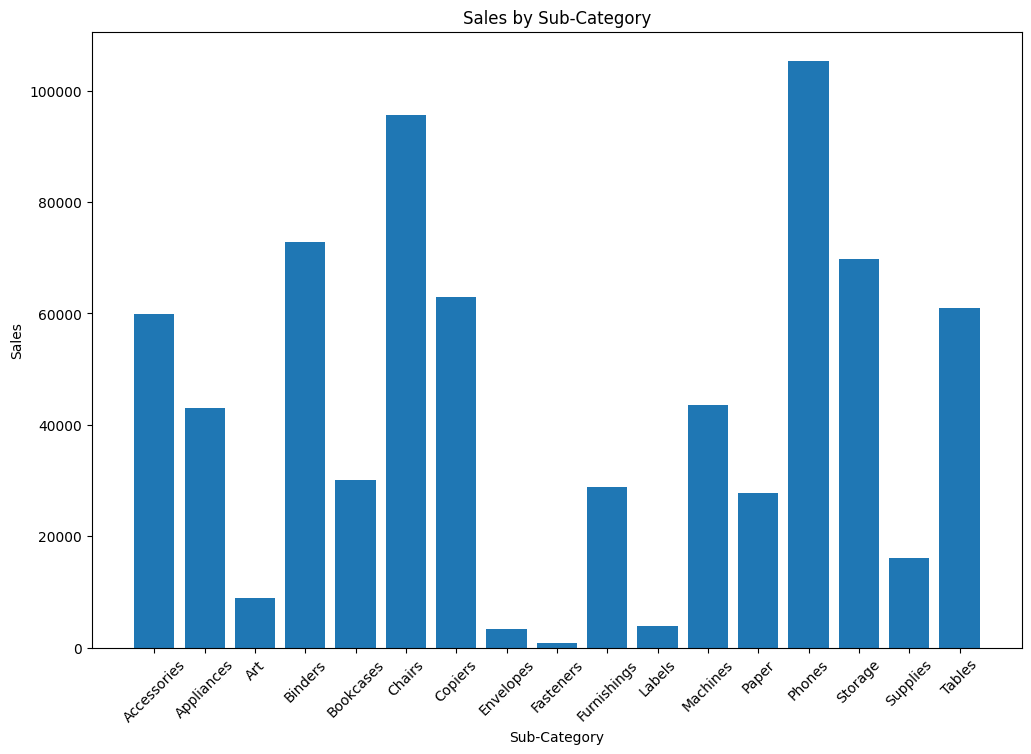

In [ ]:

# Create a bar chart for Sales by Sub-Category.
plt.figure(figsize=(12, 8))
bars = plt.bar(df['Sub-Category'], df['Sales'])
plt.title('Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')

# Rotate x-axis labels for better fit
plt.xticks(rotation=45)

plt.show()


This tells you that phones are the most sold and fasteners are the least sold.

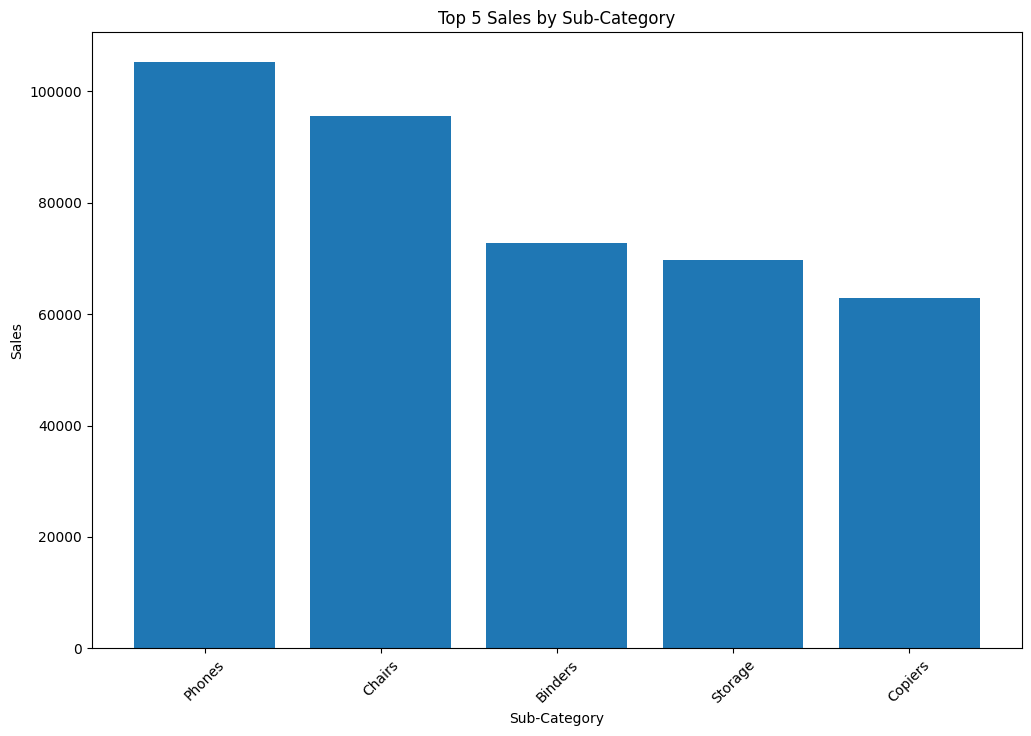

<Figure size 640x480 with 0 Axes>

In [ ]:
# Exclude the 'Order Date' column before performing the sum operation
group_data = sales.drop(columns=['Order Date']).groupby('Sub-Category').sum()
group_data.reset_index(inplace=True)

# Sort the data by the 'Sales' column in descending order and get the top 5 rows
top_5 = group_data.nlargest(5, 'Sales')

# Create a bar chart for the top 5 sub-categories by sales
plt.figure(figsize=(12, 8))
bars = plt.bar(top_5['Sub-Category'], top_5['Sales'])
plt.title('Top 5 Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')

# Rotate x-axis labels for better fit
plt.xticks(rotation=45)

plt.show()
# Save the visualization
plt.savefig('top_5_sales_by_subcategory.png', dpi=300)

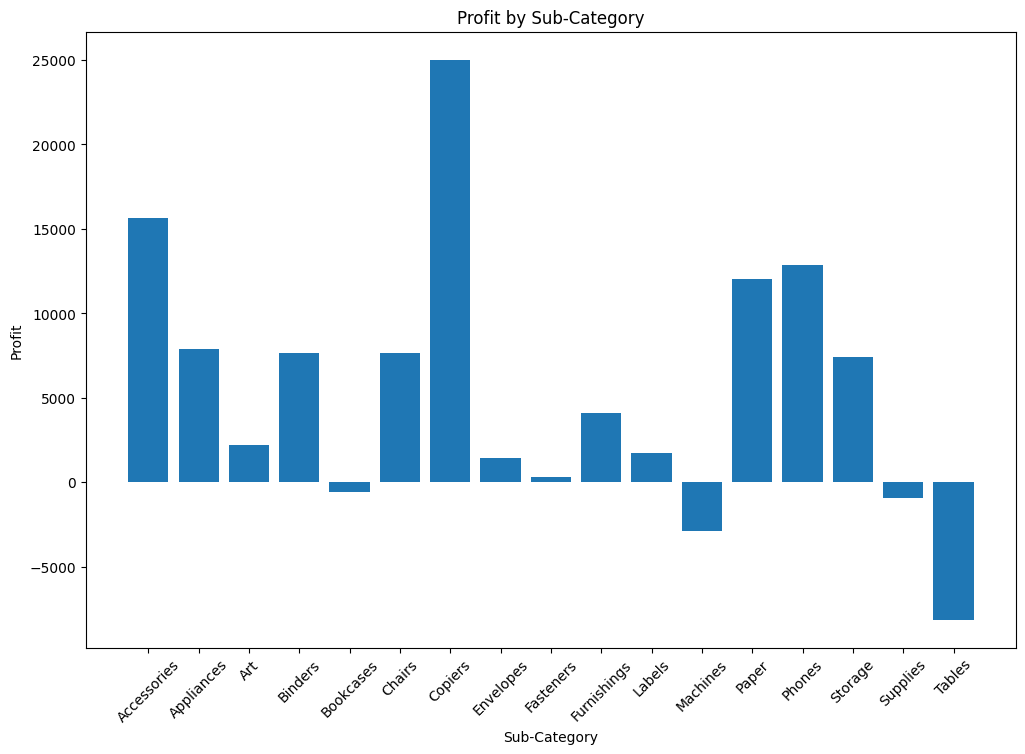

<Figure size 640x480 with 0 Axes>

In [ ]:
# Create a bar chart for Profit by Sub-Category
plt.figure(figsize=(12, 8))
plt.bar(df['Sub-Category'], df['Profit'])
plt.title('Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()
plt.savefig('profit_by_subcategory.png', dpi=300)

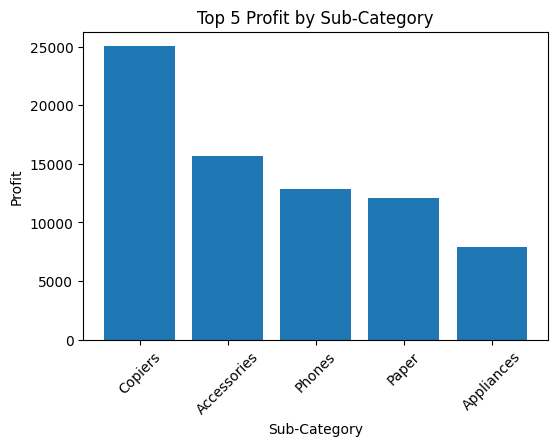

<Figure size 640x480 with 0 Axes>

In [ ]:
# Exclude the 'Order Date' column before performing the sum operation
group_data = sales.drop(columns=['Order Date']).groupby('Sub-Category').sum()
group_data.reset_index(inplace=True)

# Sort the data by the 'Profit' column in descending order and get the top 5 rows
top_5 = group_data.nlargest(5, 'Profit')

# Create a bar chart for the top 5 sub-categories by profit
plt.figure(figsize=(6, 4))
plt.bar(top_5['Sub-Category'], top_5['Profit'])
plt.title('Top 5 Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')

# Rotate x-axis labels for better fit
plt.xticks(rotation=45)

plt.show()
# Save the visualization
plt.savefig('top_5_profit_by_subcategory.png', dpi=300)

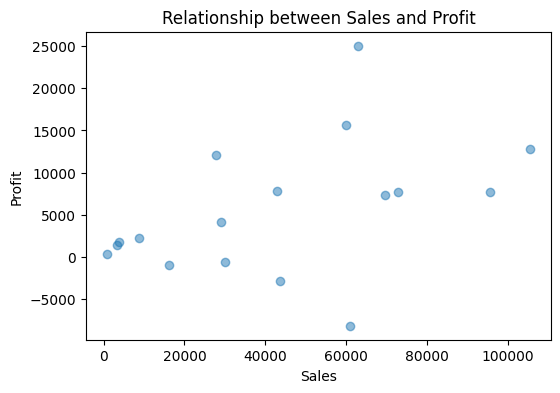

<Figure size 640x480 with 0 Axes>

In [ ]:
# Create a scatter plot for Sales and Profit
#this is to indicate the relationship between sales and profit
plt.figure(figsize=(6, 4))
plt.scatter(df['Sales'], df['Profit'], alpha=0.5)
plt.title('Relationship between Sales and Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()
# Save the visualization
plt.savefig('sales_vs_profit.png', dpi=300)

In [ ]:
#Lets check now how profits compare to sales made
# Create a bar chart with color representation for Sales and Profit by Sub-Category

fig = px.bar(df, x='Sub-Category', y='Sales', color='Profit', color_continuous_scale=["red", "yellow", "green"],
             title='Sales & Profit by Sub Category')

# Display the plot
fig.show()
# Save the visualization
plt.savefig('sales_and_profit_by_sub_category.png', dpi=300)

<Figure size 640x480 with 0 Axes>

In [ ]:
#Lets plot profit and sales for the year 2020
# sorting values by order date
sorted_data = sales.sort_values(by=['Order Date'])
# adding cummulative for  sales and profit
sorted_data['cummulative_sales'] = sorted_data['Sales'].cumsum()
sorted_data['cummulative_profit'] = sorted_data['Profit'].cumsum()
sorted_data.tail()
sorted_data.head()
# Create a line chart for cumulative sales and cumulative profit over time
fig = px.line(sorted_data, x='Order Date', y=['cummulative_sales', 'cummulative_profit'],
              title='Sales/Profit Development', color_discrete_map={'cummulative_sales': 'green', 'cummulative_profit': 'yellow'})

# Display the plot
fig.show()

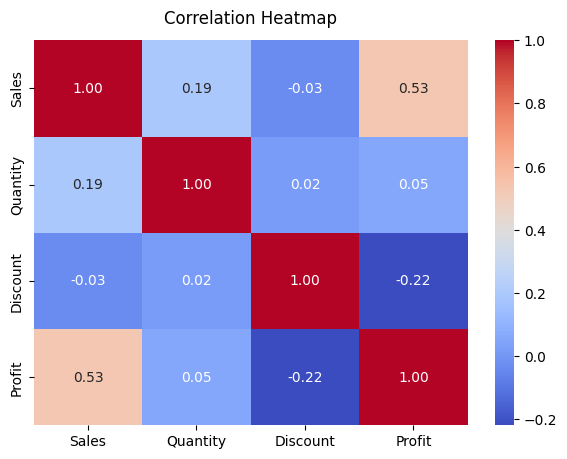

<Figure size 640x480 with 0 Axes>

In [ ]:

# Select the numerical columns for correlation analysis
numerical_columns = ['Sales', 'Quantity', 'Discount', 'Profit']

# Calculate the correlation matrix
correlation_matrix = sales[numerical_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
heatmap.set_title('Correlation Heatmap', pad=12)
plt.show()
# Save the visualization
plt.savefig('correlation_heatmap.png', dpi=300)

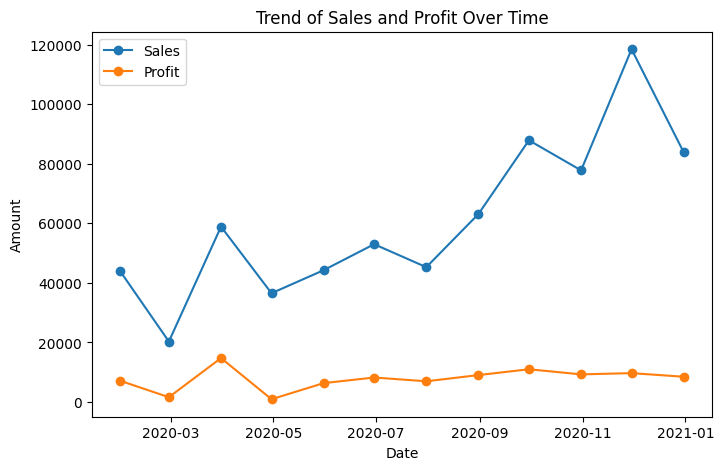

<Figure size 640x480 with 0 Axes>

In [ ]:
#Sales and profit trends overtime
# Set the 'Order Date' column as the index if it's not already
sales.set_index('Order Date', inplace=True)

# Resample the data to get the monthly sales and profit
monthly_data = sales.resample('M')[['Sales', 'Profit']].sum()

# Plot the trend of Sales and Profit over time
plt.figure(figsize=(8, 5))
plt.plot(monthly_data.index, monthly_data['Sales'], label='Sales', marker='o')
plt.plot(monthly_data.index, monthly_data['Profit'], label='Profit', marker='o')
plt.title('Trend of Sales and Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()
# Save the visualization
plt.savefig('Trends_of_sales_and_profit_over_time.png', dpi=300)

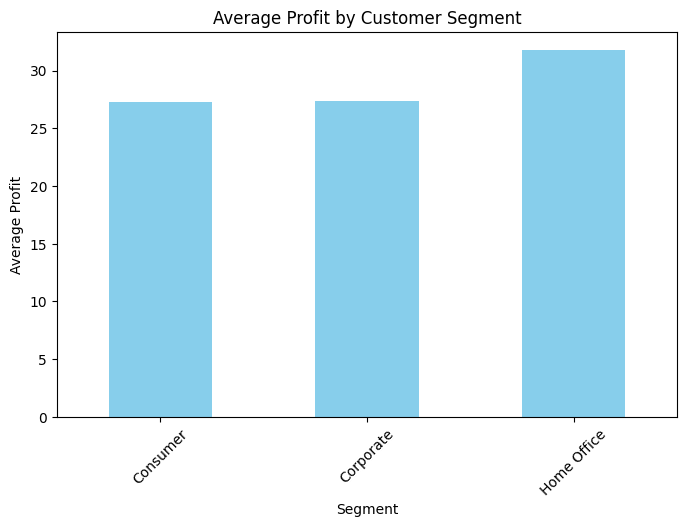

<Figure size 640x480 with 0 Axes>

In [ ]:
#Average profit per segment
# Calculate the average profit across different customer segments
average_profit_by_segment = sales.groupby('Segment')['Profit'].mean().sort_values()

# Create a bar chart to visualize the average profit by segment
plt.figure(figsize=(8, 5))
average_profit_by_segment.plot(kind='bar', color='skyblue')
plt.title('Average Profit by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Average Profit')
plt.xticks(rotation=45)
plt.show()
# Save the visualization
plt.savefig('average_profit_by_customer_segment.png', dpi=300)

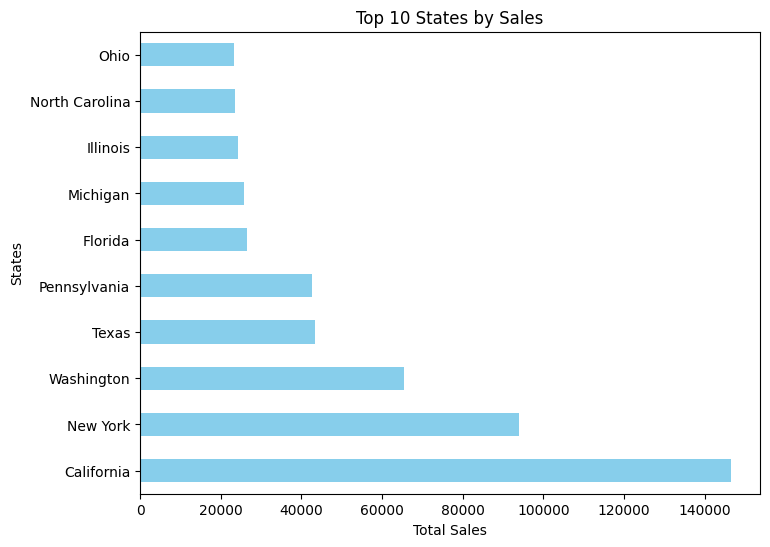

In [ ]:
#Visualization for 20 states by salea

# Grouping the data by state and summing the sales for each state
top_states = sales.groupby('State')['Sales'].sum().nlargest(10)

# Creating the visualization
plt.figure(figsize=(8, 6))
top_states.plot(kind='barh', color='skyblue')  # Using barh for horizontal bar plot
plt.title('Top 10 States by Sales')
plt.xlabel('Total Sales')
plt.ylabel('States')
# Save the visualization
plt.savefig('top_10_states_by_sales.png', dpi=300)


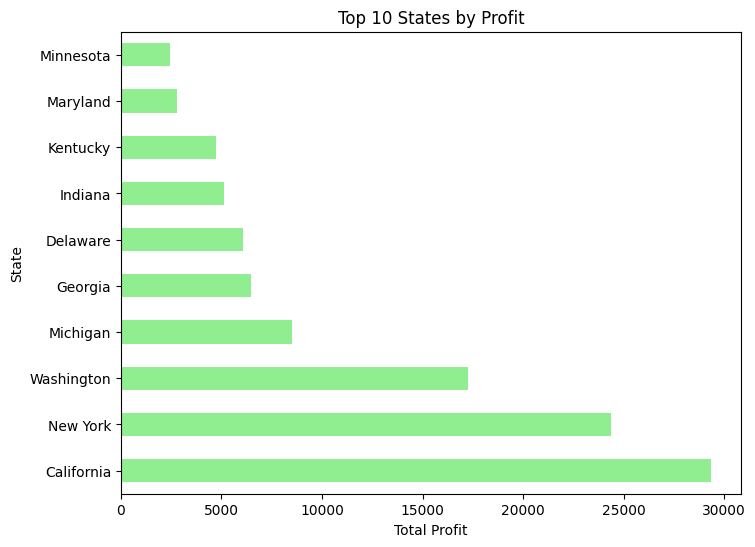

<Figure size 640x480 with 0 Axes>

In [ ]:
#Top 20 States by Profits
# Grouping the data by state and summing the profit for each state
top_states_profit = sales.groupby('State')['Profit'].sum().nlargest(10)

# Creating the visualization
plt.figure(figsize=(8, 6))
top_states_profit.plot(kind='barh', color='lightgreen')
plt.title('Top 10 States by Profit')
plt.xlabel('Total Profit')
plt.ylabel('State')
plt.show()
# Save the visualization
plt.savefig('top_10_states_by_profit.png', dpi=300)


Two important states are New York and California.

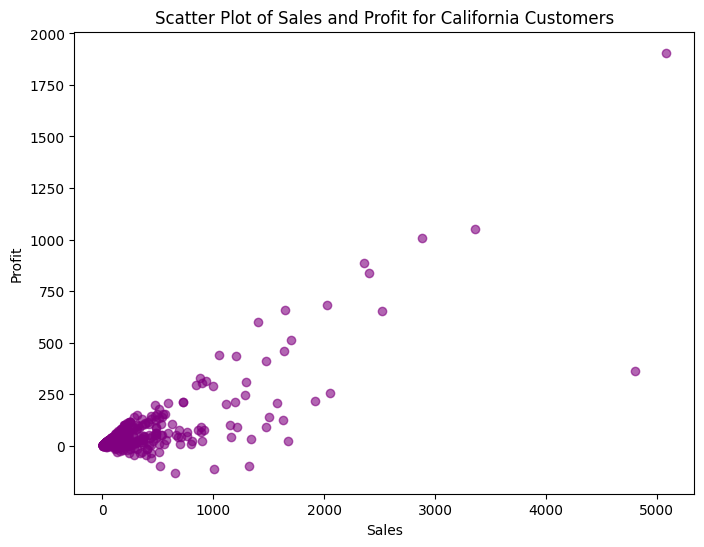

In [ ]:
#sales and profit scattering by customers in California
# Filtering the data for customers in California
california_customers = sales[(sales['State'] == 'California')]

# Creating the scatter plot for sales and profit
plt.figure(figsize=(8, 6))
plt.scatter(california_customers['Sales'], california_customers['Profit'], color='purple', alpha=0.6)
plt.title('Scatter Plot of Sales and Profit for California Customers')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


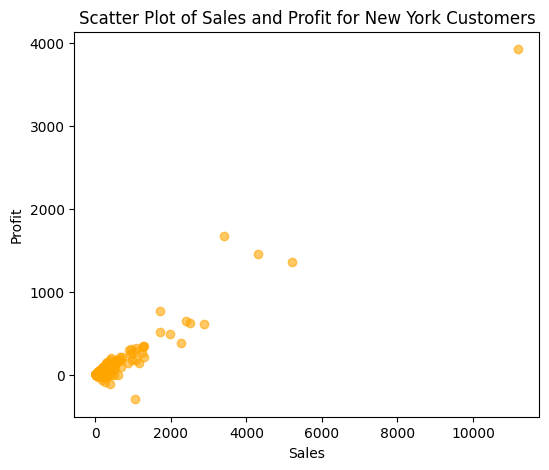

In [ ]:
#Sales and Profit scattering by customers of New York

# Filtering the data for customers in New York
new_york_customers = sales[sales['State'] == 'New York']

# Creating the scatter plot for sales and profit
plt.figure(figsize=(6, 5))
plt.scatter(new_york_customers['Sales'], new_york_customers['Profit'], color='orange', alpha=0.6)
plt.title('Scatter Plot of Sales and Profit for New York Customers')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()
